GROUP NUMBER:

GROUP MEMBERS that participated in the production of this file:

Comments:


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from collections import OrderedDict

# Problem Set 3



This problem set provides both computational and theoretical practice on forming mean-variance efficient portfolios and employing mean-variance mathematics.



### 1. 

In order to proceed you need Microsoft Excel and file "https://www.dropbox.com/s/5qituivg6ovlscr/Homework3.xlsx?dl=1". 

This file contains data for 10 value-weighted industry portfolios monthly returns over an 90-year period.  

You will be computing mean-variance efficient portfolios for these 10 industries.

Find the minimum variance and tangency portfolios of the industries. 
(hint 1:  For the tangency portfolio, put everything in excess return space and use the formular we derived in class) 


(hint 2::  to find the minimum variance portfolio, look at the maximization problem of Lecture 3 and now replace the constraint that the portfolio has to have some target expected return, by the constraint that the weights have to add up to 1-- The constraint becomes 1'@ W-1 instead of ER' @ W -mutarget , so in practice you are simply replacing the vector of average returns by a vector of 1's...What does this mean? It means that a small adjustement to the formula you use to construct the tangent portfolio will deliver for you the minimum variance portfolio.



Report their weights. Don't forget to normalize so they add up to 1, and be careful so the signs don't flip! 

Comment on the different weights applied to each industry under the MVP and Tangent portfolios




In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m').strftime("%Y-%m")
data = pd.read_excel('Homework3.xlsx', index_col=0, date_parser=dateparse)

In [3]:
def get_top_10():
    Re_top10 = []
    for x, y in data.iterrows():
        rows = OrderedDict()
        rows['NoDur'] = y['NoDur'] - y['Risk-free rate']
        rows['Durbl'] = y['Durbl'] - y['Risk-free rate']
        rows['Durbl'] = y['Durbl'] - y['Risk-free rate']
        rows['Manuf'] = y['Manuf'] - y['Risk-free rate']
        rows['Enrgy'] = y['Enrgy'] - y['Risk-free rate']
        rows['HiTec'] = y['HiTec'] - y['Risk-free rate']
        rows['Telcm'] = y['Telcm'] - y['Risk-free rate']
        rows['Shops'] = y['NoDur'] - y['Risk-free rate']
        rows['Hlth '] = y['Hlth '] - y['Risk-free rate']
        rows['Utils'] = y['Utils'] - y['Risk-free rate']
        rows['Other'] = y['Other'] - y['Risk-free rate']
        Re_top10.append(rows)

    Re_top10_df = pd.DataFrame(Re_top10, index=data.index)
    return Re_top10_df

In [7]:
Re = get_top_10()
print(Re.head())

        NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth   Utils  Other
192607   1.23  15.33   4.47  -1.40   2.68   0.61   1.23   1.55   6.82   1.94
192608   3.72   3.43   2.56   3.22   2.41   1.92   3.72   4.00  -1.94   4.13
192609   0.91   4.57   0.92  -3.62  -0.61   2.18   0.91   0.46   1.81   0.06
192610  -1.56  -8.55  -3.95  -1.10  -4.90  -0.43  -1.56  -0.89  -2.95  -3.17
192611   4.90  -0.50   3.79  -0.30   4.40   1.32   4.90   5.11   3.40   1.80


In [8]:
def mean():
    return Re.mean()


def std():
    return Re.std()


def cov():
    return Re.cov()


def rf():
    return data['Risk-free rate'].mean()


def get_mue(w):
    return np.matmul(w, Re.mean().values)


def get_var(w):
    return np.matmul(np.matmul(w, cov()), w)


def get_sp(w):
    return get_mue(w) / (get_var(w) ** .5)


def get_spNg(w):
    return -get_sp(w)

In [9]:
w0 = np.ones(10) / 10

results1 = np.matmul(w0, Re.mean())
print(results1)

0.716163704396632


In [10]:
w0_sp_ng = get_spNg(w0)
print(w0_sp_ng)

-0.1399030226981996


In [11]:
cons = ({'type': 'eq', 'fun': lambda W: W.sum() - 1})
MVP_result = minimize(get_var, w0, constraints=cons)
print(MVP_result)

     fun: 13.82303184241512
     jac: array([27.64593625, 27.64652967, 27.64618778, 27.64603615, 27.64561105,
       27.64592969, 27.64593649, 27.64641261, 27.64639568, 27.64570069])
 message: 'Optimization terminated successfully.'
    nfev: 133
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([ 0.37194169, -0.07325277, -0.1347425 ,  0.22389148, -0.11558206,
        0.55145811,  0.37194169,  0.06723138,  0.07879124, -0.34167825])


In [12]:
results2 = MVP_result.fun
print(results2)

13.82303184241512


In [13]:
results3 = MVP_result.x

print(results3)

[ 0.37194169 -0.07325277 -0.1347425   0.22389148 -0.11558206  0.55145811
  0.37194169  0.06723138  0.07879124 -0.34167825]


In [14]:
Tang_result = minimize(get_spNg, w0, constraints=cons)
results4 = Tang_result.x
print(results4)

[ 0.40090789  0.08308327 -0.19176004  0.31832745  0.01131582  0.33910164
  0.40090787  0.32003912 -0.03203101 -0.64989201]


In [15]:
w = np.matmul(np.linalg.inv(data.iloc[:, :10].subtract(data['Risk-free rate'], axis='index').cov()), mean().values)
w_Tang = w / w.sum()
print(w_Tang)

[ 0.89886135  0.11019896 -0.19487268  0.30782105  0.03610035  0.34614759
 -0.16462772  0.32476158 -0.03476057 -0.6296299 ]


In [16]:
wt_sum = w_Tang.sum()
print(wt_sum)

1.0


In [17]:
result5 = get_sp(Tang_result.x)
print(result5)

0.18997167524217853


In [18]:
result6 = get_sp(w_Tang)
print(result6)

0.1895653512972922


### 2. 

a)Compute the means and standard deviations of the minimum variance portfolio and Tangent portfolios.  

b)Plot the mean-standard deviation efficient frontier of these 10 industries. Plot the 10 industries as well on a mean-standard deviation diagram.  
- Do that for the case that you have free borrowing and lending like we did in the beggining of notebook 4, where we can simply scale up and down the tangency portfolio weights, and also for the case that you cannot borrow or invest in the risk-free asset-- for this case you will need to use the maximizer that we use in the end of notebook 4.

c)Plot the mean-variance efficient frontier of these 10 industries. Plot the 10 industries as well on a mean-standard deviation diagram. 
- Do that for the case that you have free borrowing and lending like we did in the beggining of notebook 4, where we can simply scale up and down the tangency portfolio weights, and also for the case that you cannot borrow or invest in the risk-free asset-- for this case you will need to use the maximizer that we use in the end of notebook 4.







In [19]:
print(get_mue(results3))
print(get_var(results3))
print(get_var(w_Tang))
print(get_var(w_Tang))

0.6478158428310954
13.82303184241512
16.682521308039824
16.682521308039824


In [20]:
std_mu = pd.DataFrame([mean() + rf(), std()], index=['Mu', 'Std']).T
print(std_mu)

             Mu       Std
NoDur  0.985781  4.626245
Durbl  1.098952  7.764269
Manuf  1.021487  6.308047
Enrgy  1.024219  6.097319
HiTec  1.094874  7.319941
Telcm  0.869167  4.608105
Shops  0.985781  4.626245
Hlth   1.106623  5.603567
Utils  0.883714  5.572461
Other  0.911431  6.476691


In [21]:
targetmue = np.linspace(0.6, 1.2, 60)

In [22]:
ef_std_mu = []

for mue in targetmue: 
    cons = ({'type': 'eq', 'fun': lambda W: get_mue(W) - mue},
            {'type': 'eq', 'fun': lambda W: W.sum() - 1})
    result = minimize(get_var, w0, constraints={'type': 'eq', 'fun': lambda W: W.sum() - 1})
    w = result.x
    std = result.fun ** 0.5
    ef_std_mu.append([mue + rf(), std])

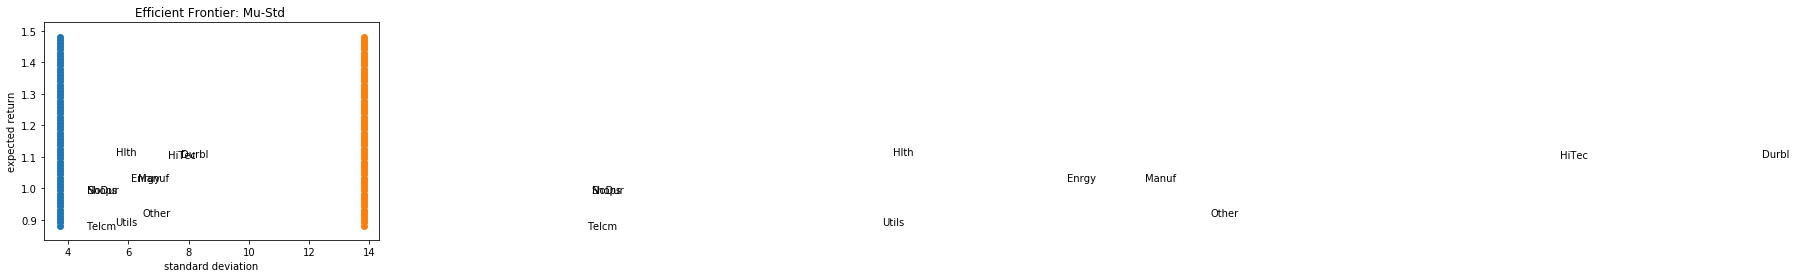

In [25]:
ef_std_mu = np.array(ef_std_mu)

plt.xlabel('standard deviation')
plt.ylabel('expected return')
plt.title('Efficient Frontier: Mu-Std ')

plt.scatter(ef_std_mu[:, 1], ef_std_mu[:, 0])
for i in std_mu.index:
    plt.text(std_mu.loc[i, 'Std'], std_mu.loc[i, 'Mu'], i)

plt.xlabel('standard deviation')
plt.ylabel('expected return')
plt.title('Efficient Frontier: Mu-Std ')

plt.scatter(ef_std_mu[:, 1] ** 2, ef_std_mu[:, 0])
for i in std_mu.index:
    plt.text(std_mu.loc[i, 'Std'] ** 2, std_mu.loc[i, 'Mu'], i)
plt.savefig("plt.png")
plt.show()

### 3. 

a)Comment on the reliability of the mean return estimates for each industry.

b)Describe how you would evaluate if they are well estimated.

c)Construct the 95% confidence interval for the estimator of each industry expected return.


d)Artificially change the mean return estimates of each industry by a one standard error increase.  How much does the Tangent portfolio change?  Does the efficient frontier change a lot or a little? What does that teach us?
 
- Do that for the case that you have free borrowing and lending like we did in the beggining of notebook 4, where we can simply scale up and down the tangency portfolio weights, and also for the case that you cannot borrow or invest in the risk-free asset-- for this case you will need to use the maximizer that we use in the end of notebook 4.


In [27]:
std_mu['95%CI_lower'] = std_mu['Mu'] - 1.64 * (std_mu['Std'] / (Re.shape[0] ** .5))
std_mu['95%CI_higher'] = std_mu['Mu'] + 1.64 * (std_mu['Std'] / (Re.shape[0] ** .5))
Mue_L = std_mu['95%CI_lower']
Mue_H = std_mu['95%CI_higher']
print(Mue_L)
print(Mue_H)

NoDur    0.753730
Durbl    0.709499
Manuf    0.705078
Enrgy    0.718379
HiTec    0.727708
Telcm    0.638026
Shops    0.753730
Hlth     0.825550
Utils    0.604201
Other    0.586562
Name: 95%CI_lower, dtype: float64
NoDur    1.217832
Durbl    1.488406
Manuf    1.337897
Enrgy    1.330059
HiTec    1.462040
Telcm    1.100309
Shops    1.217832
Hlth     1.387696
Utils    1.163227
Other    1.236300
Name: 95%CI_higher, dtype: float64


### 4. 

a) Comment on the reliability of the covariance matrix estimate.  

b) First,lets ignore covaraince terms:  assume that all covariances are zero and recompute the efficient frontier using the diagonal matrix of variances as the covariance matrix. (you might find the fucntion diag() from the numpy package very useful here). For this one you can focus on the case with free borrowing and lending. Report the tangency portfolio weights.

c)Then, lets also ignore variance terms: assume very simply that the covariance matrix is just the identity matrix (i.e., a matrix of ones along the diagonal and zeros everywhere else). Compute tangency portfolio weights

d) Now lets assume that the average returns are the same, replicated the analysis in (c), look at the weights, what portfolio is this? 

d) Does the mean-variance frontier change a lot or a little, relative to the analysis in 3)?  

e) Discuss how important are the covariance terms relative to the variance terms.



In [28]:
Cov_Diag = np.diag(np.diag(cov()))
Cov_Zdiag = cov() - Cov_Diag

w0 = np.ones(10) / 10

results1 = np.matmul(w0, Re.mean())
print(results1)
w0_sp_ng = get_spNg(w0)
print(w0_sp_ng)
cons = ({'type': 'eq', 'fun': lambda W: W.sum() - 1})
MVP_result = minimize(get_var, w0, constraints=cons)
print(MVP_result)
results41 = MVP_result.fun
results42 = MVP_result.x
print(results41)
print(results42)
Tang_result = minimize(get_spNg, w0, constraints=cons)
results43 = Tang_result.x
print(results43)
w = np.matmul(np.linalg.inv(Cov_Zdiag), mean().values)
w_Tang = w / w.sum()
print(w_Tang)
print(w_Tang.sum())
print(get_sp(Tang_result.x))
print(get_sp(w_Tang))

0.716163704396632
-0.1399030226981996
     fun: 13.82303184241512
     jac: array([27.64593625, 27.64652967, 27.64618778, 27.64603615, 27.64561105,
       27.64592969, 27.64593649, 27.64641261, 27.64639568, 27.64570069])
 message: 'Optimization terminated successfully.'
    nfev: 133
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([ 0.37194169, -0.07325277, -0.1347425 ,  0.22389148, -0.11558206,
        0.55145811,  0.37194169,  0.06723138,  0.07879124, -0.34167825])
13.82303184241512
[ 0.37194169 -0.07325277 -0.1347425   0.22389148 -0.11558206  0.55145811
  0.37194169  0.06723138  0.07879124 -0.34167825]
[ 0.40090789  0.08308327 -0.19176004  0.31832745  0.01131582  0.33910164
  0.40090787  0.32003912 -0.03203101 -0.64989201]
[-0.14039101  0.31417026  0.33946672  0.04929078  0.26333891 -0.04655538
 -0.14039101 -0.23481537  0.16205327  0.43383284]
1.0
0.18997167524217853
0.09520753975036232


### 5. 

a) construct the portfolios returns for the 4 different approaches discussed in 3 and 4:tangent portfolio, minimum variance portfolio, minimum variance portfolio that ignores covariance terms, minimum variance portfolio that ignore covariance terms and assume variances are the same.


b) report mean returns for 4 portfolios

c) report mean returns in excess of the risk-free rate

d) Report standard deviations

e) report portfolio sharpe ratios by dividing the answer in (c) by the answer in (d)

f) Discuss the results. Is it surprising what you find? What does that teach us about the different approaches?

g) Suggest an empirical approach to learn even more about which strategy is better (no need to implement just discuss) 


## MORE QUESTIONS WILL BE ADDED ON THURSDAY